# Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


## Exercises

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

# Import the necessary libraries

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

#### Loading the nsfg data

In [3]:
# Making 3 different dataframes for live, first and other babies
live, firsts, others = first.MakeFrames()

Computing the distribution of live babies, first babies and others. Using the distribution after dropping the na values also.

In [4]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))


Firsts 4413 4363
Others 4735 4675


In [5]:
first_wgt_dropna.head

<bound method NDFrame.head of 0        8.8125
2        9.1250
5        8.5625
8        7.5625
10       7.8125
          ...  
13576    6.4375
13578    6.0000
13581    6.3750
13584    6.3750
13588    6.1875
Name: totalwgt_lb, Length: 4363, dtype: float64>

The below function 'PercentileRank' computes the Percentile Rank of the First weights and other weights

In [6]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [7]:
# Calculating the rank of the birth weight of 7.8 lbs as a fisrt baby.
# It seems that the percentile rank was 68.2
PercentileRank(first_wgt_dropna, 7.8)

68.27870731148292

In [8]:
# Calculating the rank of the birth weight of 7.8 lbs as an other baby.
# It seems that the percentile rank was 63
PercentileRank(other_wgt_dropna, 7.8)

63.101604278074866

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [9]:
# Generating the random numbers 
n = np.random.random(1000)

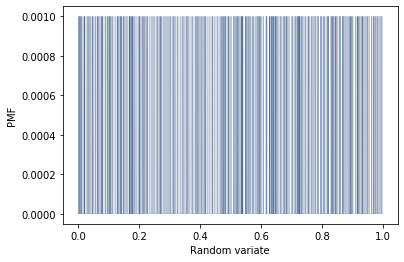

In [10]:
# Plot the PMF for the distribution

pmf = thinkstats2.Pmf(n)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

#### In the above plot as each value has the same probaility so the lines show the same height.

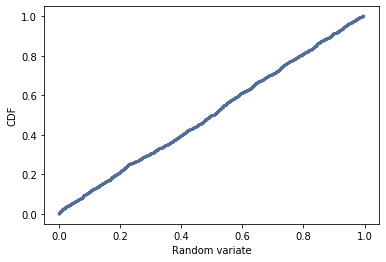

In [11]:
# Plotting the CDF

cdf = thinkstats2.Cdf(n)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')